In [34]:
import numpy as np
import pandas as pd
import seaborn as sns

from itertools import product
from scipy.stats import norm, binom, mannwhitneyu
from tqdm import tqdm

# Сгенерированные данные. В вашем случае здесь нужно загрузить данные за продолжительный
# исторический период. Это необходимо, чтобы учесть поведение клиента и распределение 
# оригинальной метрики
np.random.seed(1)
mu = 42.
sd = 10.
data = norm.rvs(loc=mu, scale=sd, size=10000)
alpha = 0.05 # 1 - уровень значимости
simulations = 1000 # количество симуляций
lifts = np.arange(1, 1.1, 0.01) # последовательность шагов по эффекту

# Последовательность шагов по увеличению выборки. Я бы не рекомендовал использовать в живом проекте такой метод,
# т.к. не наследуется информация об окне метрики. Чтобы его учесть, лучше брать даты в качестве шага
sizes = np.arange(1000, 10001, 1000)

sim_res = pd.DataFrame() # сюда кладем результат расчетов

for lift, n in product(lifts, sizes): 
    print(lift, n)
    
    control = data[0:n]

    # В этом примере равномерно распределяем эффект по всему распределению
    test = control * lift 
    
    for _ in tqdm(range(0, simulations)):
        
        # Рандомное присвоение групп A/B
        is_control = binom.rvs(1, 0.5, size=n) 
        
        # Считаем p-value
        _, p = mannwhitneyu(control[is_control == True], test[is_control == False]) 

        # Кладем результат
        sim_res = sim_res.append({"lift": lift, "n": n, "pvalue": p}, ignore_index=True)
        
def calculate_tpr(df, sim_num):
    names = {
        "tpr": sum(df['pvalue'] < 0.05) / sim_num
    }
    return pd.Series(names)
    
res = sim_res.groupby(["lift", "n"]).apply(calculate_tpr, sim_num=simulations).reset_index()



1.0 1000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 944.55it/s]


1.0 2000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 786.02it/s]


1.0 3000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 705.14it/s]


1.0 4000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 636.85it/s]


1.0 5000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 598.78it/s]


1.0 6000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 540.90it/s]


1.0 7000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 501.25it/s]


1.0 8000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 466.20it/s]


1.0 9000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 432.93it/s]


1.0 10000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 401.16it/s]


1.01 1000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 927.13it/s]


1.01 2000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 805.66it/s]


1.01 3000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 729.41it/s]


1.01 4000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 658.49it/s]


1.01 5000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 586.07it/s]


1.01 6000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 534.43it/s]


1.01 7000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 488.68it/s]


1.01 8000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 450.55it/s]


1.01 9000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 410.78it/s]


1.01 10000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 393.65it/s]


1.02 1000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 915.15it/s]


1.02 2000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 795.75it/s]


1.02 3000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 697.68it/s]


1.02 4000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 639.19it/s]


1.02 5000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 568.56it/s]


1.02 6000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 518.62it/s]


1.02 7000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 478.61it/s]


1.02 8000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 449.77it/s]


1.02 9000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 424.63it/s]


1.02 10000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 401.48it/s]


1.03 1000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 920.53it/s]


1.03 2000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 791.15it/s]


1.03 3000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 707.34it/s]


1.03 4000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 641.51it/s]


1.03 5000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 551.37it/s]


1.03 6000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 517.50it/s]


1.03 7000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 487.63it/s]


1.03 8000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 458.52it/s]


1.03 9000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 424.53it/s]


1.03 10000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 388.94it/s]


1.04 1000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 907.22it/s]


1.04 2000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 787.14it/s]


1.04 3000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 696.94it/s]


1.04 4000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 631.91it/s]


1.04 5000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 569.80it/s]


1.04 6000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 510.39it/s]


1.04 7000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 474.25it/s]


1.04 8000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 450.18it/s]


1.04 9000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 424.18it/s]


1.04 10000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 400.82it/s]


1.05 1000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 925.92it/s]


1.05 2000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 808.16it/s]


1.05 3000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 719.82it/s]


1.05 4000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 650.09it/s]


1.05 5000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 586.03it/s]


1.05 6000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 531.42it/s]


1.05 7000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 491.94it/s]


1.05 8000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 458.31it/s]


1.05 9000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 426.44it/s]


1.05 10000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 399.00it/s]


1.06 1000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 915.15it/s]


1.06 2000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 786.89it/s]


1.06 3000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 681.78it/s]


1.06 4000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 611.32it/s]


1.06 5000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 554.08it/s]


1.06 6000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 496.48it/s]


1.06 7000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 465.52it/s]


1.06 8000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 435.05it/s]


1.06 9000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 399.96it/s]


1.06 10000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 374.78it/s]


1.07 1000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 856.86it/s]


1.07 2000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 760.89it/s]


1.07 3000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 675.65it/s]


1.07 4000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 641.73it/s]


1.07 5000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 578.15it/s]


1.07 6000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 523.48it/s]


1.07 7000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 478.79it/s]


1.07 8000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 450.60it/s]


1.07 9000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 416.71it/s]


1.07 10000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 388.99it/s]


1.08 1000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 888.40it/s]


1.08 2000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 762.91it/s]


1.08 3000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 660.22it/s]


1.08 4000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 601.40it/s]


1.08 5000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 541.90it/s]


1.08 6000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 483.26it/s]


1.08 7000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 460.29it/s]


1.08 8000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 423.03it/s]


1.08 9000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 397.36it/s]


1.08 10000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 374.13it/s]


1.09 1000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 821.34it/s]


1.09 2000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 720.84it/s]


1.09 3000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 655.66it/s]


1.09 4000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 591.23it/s]


1.09 5000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 530.40it/s]


1.09 6000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 504.97it/s]


1.09 7000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 464.41it/s]


1.09 8000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 422.19it/s]


1.09 9000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 394.63it/s]


1.09 10000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 370.22it/s]


1.1 1000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 823.47it/s]


1.1 2000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 727.25it/s]


1.1 3000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 667.34it/s]


1.1 4000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 608.24it/s]


1.1 5000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 549.03it/s]


1.1 6000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 501.19it/s]


1.1 7000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 461.92it/s]


1.1 8000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 432.02it/s]


1.1 9000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 405.16it/s]


1.1 10000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 379.63it/s]


,lift,n,tpr
0,1.0,1000.0,0.100
1,1.0,2000.0,0.112
2,1.0,3000.0,0.099
3,1.0,4000.0,0.104
4,1.0,5000.0,0.101
...,...,...,...
105,1.1,6000.0,1.000
106,1.1,7000.0,1.000
107,1.1,8000.0,1.000
108,1.1,9000.0,1.000


<AxesSubplot:xlabel='n', ylabel='tpr'>

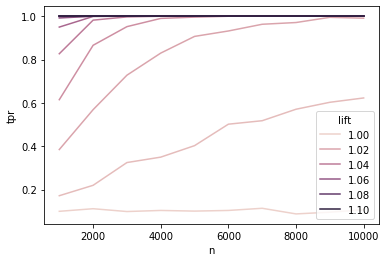

In [46]:
display(res)
sns.lineplot(data=res, x="n", y="tpr", hue="lift")